TITLE: PREDICTION OF HIV RISK CATEGORY USING RANDOM FOREST ALGORITHM

This a machine learning project that leverages the random forest algorithm to classify individuals into different HIV risk category based on relevant features to determine their likehood of contracting HIV.

General objectives 
To develop a  predictive model capable of predicting HIV risk categories of individuals’ likehood of contracting HIV.

Specific objectives 
i.	To determine how several features impact the spread of HIV. 
ii.	To identify the patterns and trends of different features impacting HIV through visualizations.
iii.	 To develop a predictive model capable of identifying  individual’s HIV  risk category for further interventions. 
iv.	To evaluate the effectiveness of model performance through accuracy,precision,recall.



Importing libraries

Data Handling: pandas, numpy

Visualization: matplotlib, seaborn

ML Model & Preprocessing: sklearn

Imbalanced Data Handling: imblearn.SMOTE

Suppress Warnings: warnings.filterwarnings('ignore')


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import imblearn
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings('ignore')

Data loading

In [44]:
data=pd.read_csv("C:/Users/user/Desktop/HIV\HIV_dataset.csv")
data

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE
...,...,...,...,...,...,...,...,...,...,...
693,19,UNMARRIED,YES,Illiteracy,NO,NO,Internet,Heterosexual,NO,POSITIVE
694,47,MARRIED,NO,College Degree,NO,YES,Bar,Bisexual,NO,NEGATIVE
695,34,UNMARRIED,YES,Senior High School,YES,YES,Park,Homosexual,YES,NEGATIVE
696,25,MARRIED,NO,Junior High School,NO,NO,Public Bath,Heterosexual,YES,POSITIVE


# Exploratory data analysis
data information,

checking missing values,

data conversion,

summary statistics for numerical features,

encoding,

visualizations

In [45]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   Educational Background          698 non-null    object
 4   HIV TEST IN PAST YEAR           698 non-null    object
 5   AIDS education                  698 non-null    object
 6   Places of seeking sex partners  676 non-null    object
 7   SEXUAL ORIENTATION              698 non-null    object
 8   Drug- taking                    698 non-null    object
 9   Result                          698 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB
None


In [46]:
#checking missing values
print(data.isnull().sum())

Age                                0
Marital Staus                      0
STD                                0
Educational Background             0
HIV TEST IN PAST YEAR              0
AIDS education                     0
Places of seeking sex partners    22
SEXUAL ORIENTATION                 0
Drug- taking                       0
Result                             0
dtype: int64


In [47]:
#filling missing values
data.fillna(method='ffill',inplace=True)

Conveting unique varibles into lowecase for consistency

In [48]:
#converting variables into lowercase
data['Marital Staus'].unique()
# Convert all values in the column to lowercase
data['Marital Staus'] = data['Marital Staus'].str.lower()
data['Result'] = data['Result'].str.lower()
# Convert all values in the column to uppercase
data['Drug- taking'] = data['Drug- taking'].str.upper()
data['AIDS education'] = data['AIDS education'].str.upper()
data['STD']=data['STD'].str.upper()
print(data)

     Age Marital Staus  STD Educational Background HIV TEST IN PAST YEAR  \
0     22     unmarried   NO         College Degree                   YES   
1     20     unmarried   NO         College Degree                    NO   
2     23       married  YES         College Degree                    NO   
3     24       married   NO         College Degree                   YES   
4     18     unmarried  YES     Senior High School                   YES   
..   ...           ...  ...                    ...                   ...   
693   19     unmarried  YES             Illiteracy                    NO   
694   47       married   NO         College Degree                    NO   
695   34     unmarried  YES     Senior High School                   YES   
696   25       married   NO     Junior High School                    NO   
697   46    cohabiting  YES     Senior High School                   YES   

    AIDS education Places of seeking sex partners SEXUAL ORIENTATION  \
0              

In [49]:
data['Drug- taking'].unique()

array(['YES', 'NO'], dtype=object)

In [50]:
data['AIDS education'].unique()

array(['NO', 'YES'], dtype=object)

#summary statistics for numerical features

In [51]:
print("summary statistics for numerical feature:\n")
print(data.describe())

##summary statistics for categorical features
print("\n summary statistics for categorical features")
print(data.describe(include=['object','category']))

summary statistics for numerical feature:

              Age
count  698.000000
mean    40.022923
std     18.154906
min     12.000000
25%     25.000000
50%     38.000000
75%     54.000000
max     80.000000

 summary statistics for categorical features
       Marital Staus  STD Educational Background HIV TEST IN PAST YEAR  \
count            698  698                    698                   698   
unique             5    2                      6                     2   
top        unmarried   NO         College Degree                    NO   
freq             276  371                    212                   428   

       AIDS education Places of seeking sex partners SEXUAL ORIENTATION  \
count             698                            698                698   
unique              2                              6                  5   
top                NO                       Internet       Heterosexual   
freq              413                            202                370   

  

# Visualizations

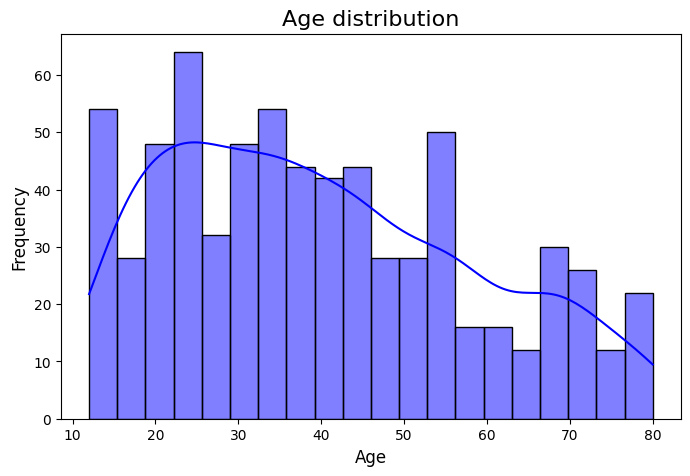

In [52]:
#AGE DISTRIBUTION VISUALIZATION
plt.figure(figsize=(8,5))
sns.histplot(data['Age'],bins=20,kde=True,color='blue')
plt.title('Age distribution',fontsize=16)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

Displays the distribution of age among individuals in the dataset.
 Insights:
    the distribution is right-skewed, younger individuals dominate the dataset.

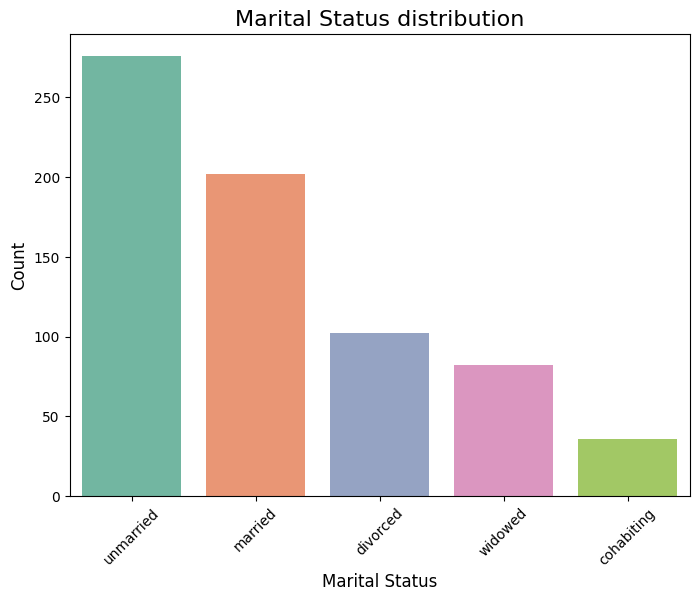

In [53]:
#count plot for categorical features
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='Marital Staus',order=data['Marital Staus'].value_counts().index,palette='Set2')
plt.title('Marital Status distribution',fontsize=16)
plt.xlabel('Marital Status',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45)
plt.show()



Shows the number of individuals in each marital status category.
  Insights:
        unmarried individuals are at higher risk of contracting HIV


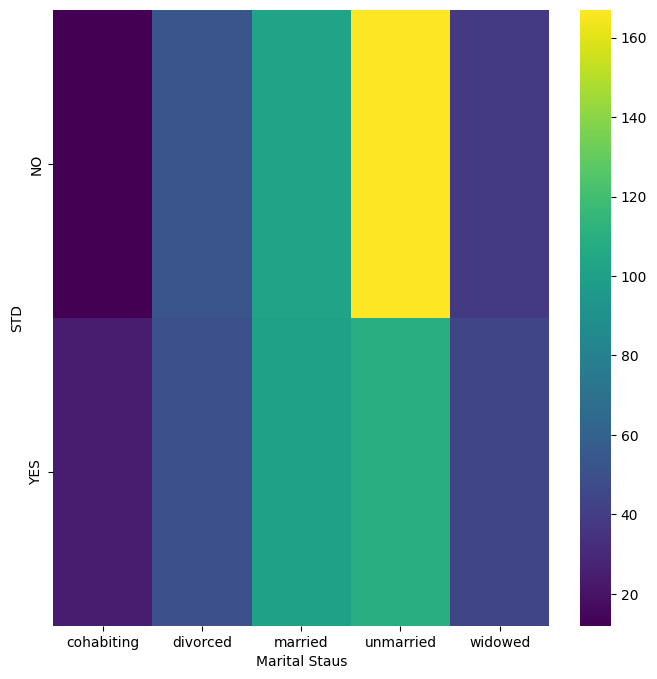

In [54]:
# @title Marital Staus vs STD
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['STD'].value_counts()
    for x_label, grp in data.groupby('Marital Staus')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Marital Staus')
_ = plt.ylabel('STD')

Shows the relationship between marital status and sexually transmitted diseases (STDs).
    Insights:
Darker colors indicate a higher correlation between marital status and STDs.
suggesting riskier behavior in specific groups eg cohabiting.


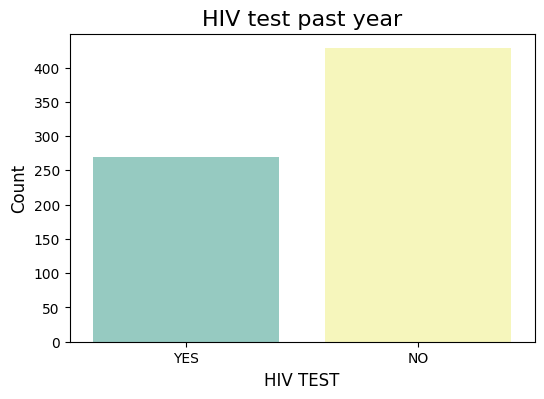

In [55]:
#HIv test in past year
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='HIV TEST IN PAST YEAR',palette='Set3')
plt.title('HIV test past year',fontsize=16)
plt.xlabel('HIV TEST',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

Shows the number of individuals who took an HIV test in the past year.
       Insights:
A high number of "No" responses  indicate a lack of awareness or fear of testing.
If many tested positive, it might suggest late detection of HIV cases.


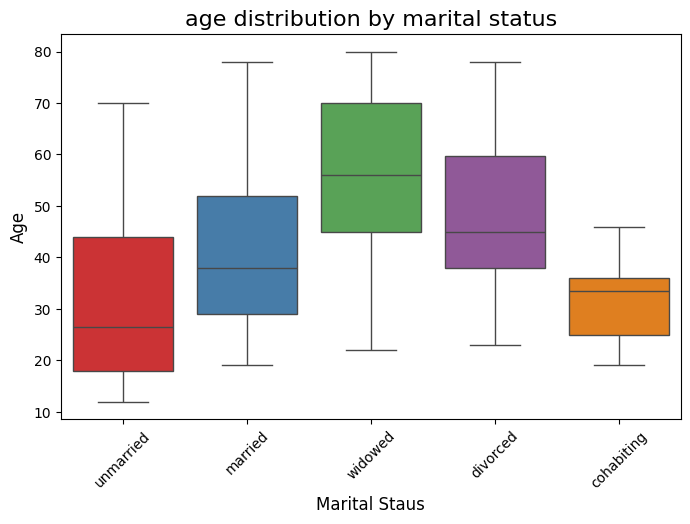

In [56]:
#boxplot;age vs marital status
plt.figure(figsize=(8,5))
sns.boxplot(data=data,x='Marital Staus',y='Age',palette='Set1')
plt.title('age distribution by marital status',fontsize=16)
plt.xlabel('Marital Staus',fontsize=12)
plt.ylabel('Age',fontsize=12)
plt.xticks(rotation=45)
plt.show()

Displays the age range within each marital status category.
    Insights:
younger people dominate certain marital categories eg divorced,unmarried  might be at higher risk.
Outliers in the boxplot might indicate atypical cases (e.g., young individuals in unusual marital categories).

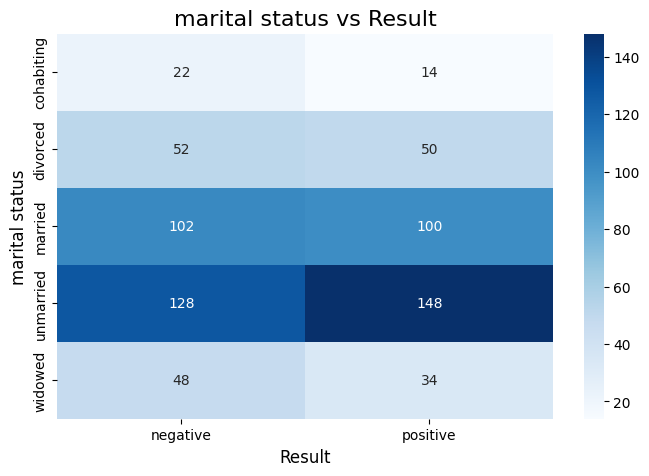

In [57]:
#heatmap;marital status vs results
plt.figure(figsize=(8,5))
contingency_table = pd.crosstab(data['Marital Staus'],data['Result'])
sns.heatmap(contingency_table,annot=True,cmap='Blues',fmt='d')
plt.title('marital status vs Result',fontsize=16)
plt.xlabel('Result',fontsize=12)
plt.ylabel('marital status',fontsize=12)
plt.show()

Insights:   
 certain marital groups  eg unmarried have higher positive cases, interventions can be targeted towards them.
Darker shades in the heatmap indicate a stronger relationship between marital status and HIV outcomes.

converting columns to lowercase 

checking unique values in marital status column

In [58]:
#converting columns to lowercase
data.columns = data.columns.str.lower()

In [59]:
print(data[["marital staus"]].value_counts())

marital staus
unmarried        276
married          202
divorced         102
widowed           82
cohabiting        36
Name: count, dtype: int64


Data encoding using label encoder

In [60]:
categorical_columns = [
    "marital staus", "std", "educational background", "hiv test in past year",
    "aids education", "places of seeking sex partners", "sexual orientation", 
    "drug- taking", "result"
]

label_encoders = {}

# Standardizing category labels before encoding
for col in categorical_columns:
    data[col] = data[col].astype(str).str.strip().str.lower()  # Convert to lowercase and strip spaces
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Save encoders
with open("label_encoders.pkl", "wb") as file:
    pickle.dump(label_encoders, file)

# Verify encoding
for feature, encoder in label_encoders.items():
    print(f"\nFeature: {feature}")
    print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


Feature: marital staus
{'cohabiting': np.int64(0), 'divorced': np.int64(1), 'married': np.int64(2), 'unmarried': np.int64(3), 'widowed': np.int64(4)}

Feature: std
{'no': np.int64(0), 'yes': np.int64(1)}

Feature: educational background
{'college degree': np.int64(0), 'college dregree': np.int64(1), 'illiteracy': np.int64(2), 'junior high school': np.int64(3), 'primary school': np.int64(4), 'senior high school': np.int64(5)}

Feature: hiv test in past year
{'no': np.int64(0), 'yes': np.int64(1)}

Feature: aids education
{'no': np.int64(0), 'yes': np.int64(1)}

Feature: places of seeking sex partners
{'bar': np.int64(0), 'internet': np.int64(1), 'others': np.int64(2), 'park': np.int64(3), 'public bath': np.int64(4)}

Feature: sexual orientation
{'bisexual': np.int64(0), 'heterosexual': np.int64(1), 'hetersexual': np.int64(2), 'homosexual': np.int64(3)}

Feature: drug- taking
{'no': np.int64(0), 'yes': np.int64(1)}

Feature: result
{'negative': np.int64(0), 'positive': np.int64(1)}


In [61]:

# Load the label encoders
with open("label_encoders.pkl", "rb") as file:
    label_encoders = pickle.load(file)

# Check encoded values for all categorical columns
for feature_name, encoder in label_encoders.items():
    classes = list(encoder.classes_)  # Get all unique categories
    encoded_values = encoder.transform(classes)  # Get corresponding numeric values

    print(f"\nFeature: {feature_name}")
    for category, encoded_value in zip(classes, encoded_values):
        print(f"  {category} -> {encoded_value}")


Feature: marital staus
  cohabiting -> 0
  divorced -> 1
  married -> 2
  unmarried -> 3
  widowed -> 4

Feature: std
  no -> 0
  yes -> 1

Feature: educational background
  college degree -> 0
  college dregree -> 1
  illiteracy -> 2
  junior high school -> 3
  primary school -> 4
  senior high school -> 5

Feature: hiv test in past year
  no -> 0
  yes -> 1

Feature: aids education
  no -> 0
  yes -> 1

Feature: places of seeking sex partners
  bar -> 0
  internet -> 1
  others -> 2
  park -> 3
  public bath -> 4

Feature: sexual orientation
  bisexual -> 0
  heterosexual -> 1
  hetersexual -> 2
  homosexual -> 3

Feature: drug- taking
  no -> 0
  yes -> 1

Feature: result
  negative -> 0
  positive -> 1


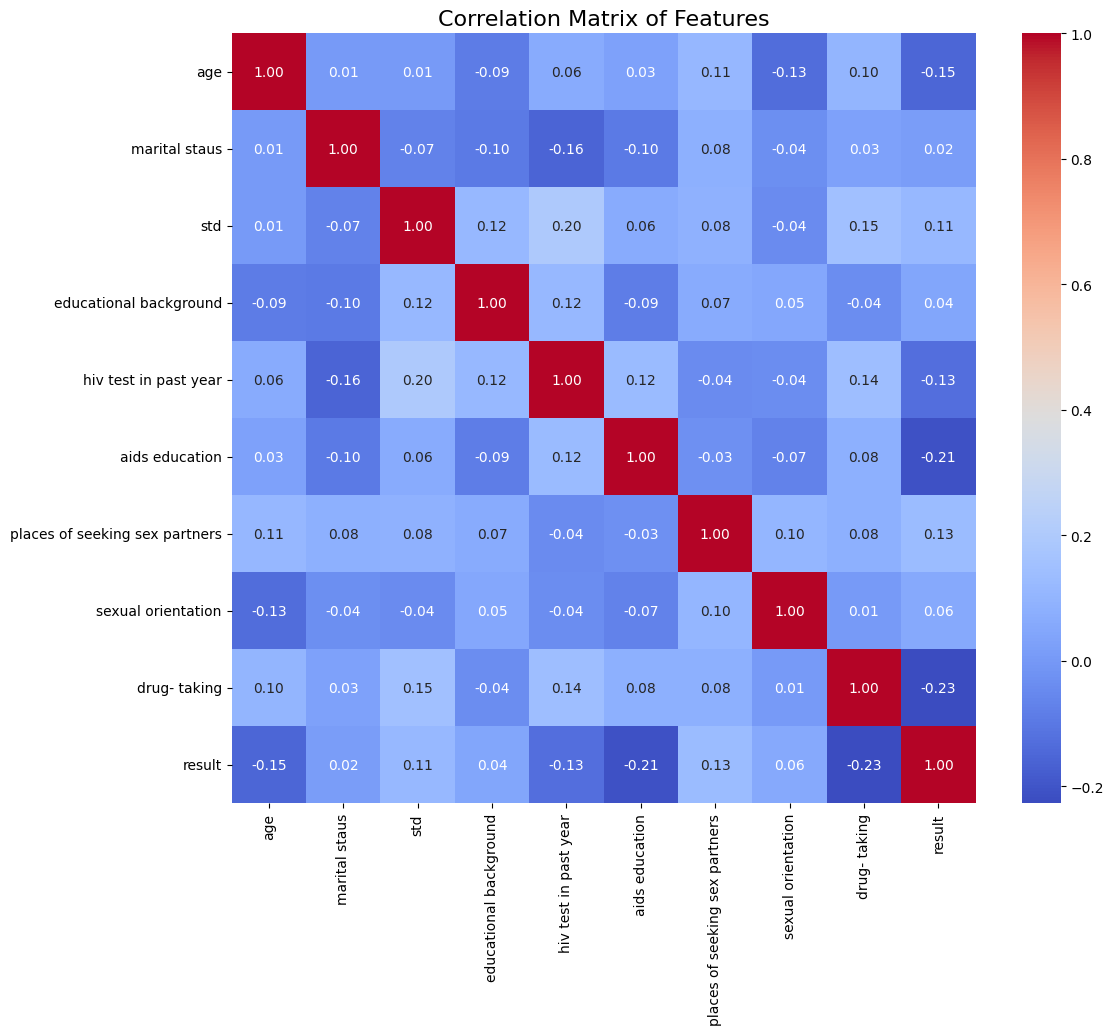

In [62]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()


Shows how strongly features are related to each other.
Values range from -1 to +1:
+1 → Strong positive correlation (as one increases, the other increases).
-1 → Strong negative correlation (as one increases, the other decreases).
0 → No correlation.


In [63]:

# Check if DataFrame is empty
if data.empty:
    print("The DataFrame is empty.")
else:
    # Display data types of columns
    print("Data types of columns:")
    print(data.dtypes)

    # Extract unique values for each column
    unique_values_before = {col: data[col].unique() for col in data.columns}
    print("Unique values before encoding:")
    for col, unique_vals in unique_values_before.items():
        print(f"{col}: {unique_vals}")


Data types of columns:
age                               int64
marital staus                     int64
std                               int64
educational background            int64
hiv test in past year             int64
aids education                    int64
places of seeking sex partners    int64
sexual orientation                int64
drug- taking                      int64
result                            int64
dtype: object
Unique values before encoding:
age: [22 20 23 24 18 15 70 44 13 19 25 75 50 76 34 45 56 27 29 40 78 16 26 37
 12 67 21 30 71 80 35 68 17 38 46 42 41 28 64 69 73 14 49 43 47 39 36 31
 32 79 57 51 48 33 59 62 54 52 61 58 53 60 65 66 55]
marital staus: [3 2 4 1 0]
std: [0 1]
educational background: [0 5 3 2 4 1]
hiv test in past year: [1 0]
aids education: [0 1]
places of seeking sex partners: [0 3 1 4 2]
sexual orientation: [1 0 3 2]
drug- taking: [1 0]
result: [1 0]


separating features and target variables:result is our target variable And standardizing numerical featurs.

In [64]:

##separate features and target variables
x=data.drop(columns=["result"])
y=data["result"]

##standardize numerical features only(age)
scaler=StandardScaler()
x["age"]=scaler.fit_transform(x[["age"]])


Balancing data using smote

In [65]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# splitting data into training and testing sets

In [66]:
#data mismatch and data selection
x=x.reset_index(drop=True)
y=y.reset_index(drop=True)

In [67]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
x_train.head()

x_train shape: (563, 9)
y_train shape: (563,)


,age,marital staus,std,educational background,hiv test in past year,aids education,places of seeking sex partners,sexual orientation,drug- taking
24,-0.938321,3,0,2,0,1,1,1,0
155,-0.993442,4,0,0,0,1,1,1,1
210,1.927972,2,0,5,1,0,3,0,0
291,0.935794,4,1,5,1,0,1,0,0
537,-0.387111,2,1,0,0,1,1,1,0


x, y = data.iloc[:, :-1], data.iloc[:, -1]

Splits the dataset into features (x) and target (y).
x = data.iloc[:, :-1] → Selects all columns except the last as input features.
y = data.iloc[:, -1] → Selects the last column as the target variable (HIV risk category).


In [68]:
data=data.dropna()
x,y=data.iloc[:,:-1],data.iloc[:,-1]


In [69]:
print("x_train:",len(x_train),"y_train:",len(y_train))
print("x_test:",len(x_test),"y_test:",len(y_test))

x_train: 563 y_train: 563
x_test: 141 y_test: 141


# train random forest classifier

In [70]:
rf_model = RandomForestClassifier(n_estimators=300,class_weight="balanced",random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

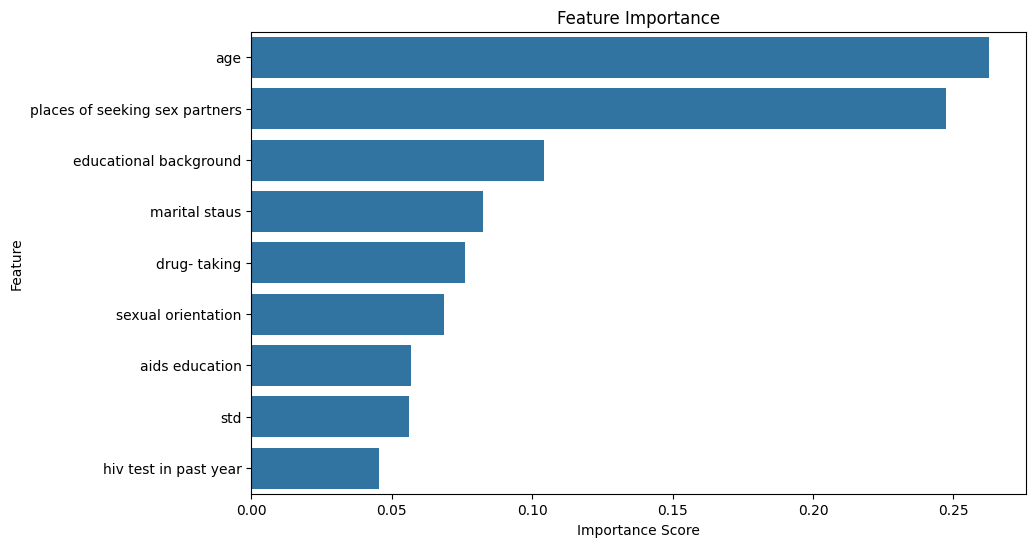

In [71]:
# Extract feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_data = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
feature_data = feature_data.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_data["Importance"], y=feature_data["Feature"])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


insights: 

Features with the highest bars play a crucial role in predicting HIV risk eg age,places of seeking sex partners,marital status,sexual orientation,std, which significantly impact the model's decision.
Low-importance features:


Prediction on test set

In [72]:
##predict on the test set
y_pred=rf_model.predict(x_test)

# evaluate the model

In [73]:
##checking unique classes in the target variable
print("Unique classes in target:",y.unique())

#evaluate the model
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print("Accuracy:",accuracy)
print("Classification Report:",report)

Unique classes in target: [1 0]
Accuracy: 0.9574468085106383
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96        74
           1       0.96      0.96      0.96        67

    accuracy                           0.96       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141



accuracy  of 0.96

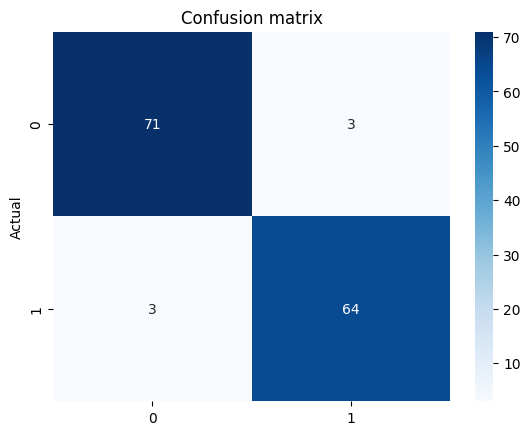

In [74]:
#Confusion matrix
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion matrix")
plt.ylabel("Actual")
plt.show()

Perfoming cross validation on 5 folds

In [75]:
# Perform Cross-Validation (5-Fold)
from sklearn.model_selection import cross_val_score,GridSearchCV
cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([0.85840708, 0.87610619, 0.90265487, 0.90178571, 0.86607143])

Hyperparameter tuning to optimise accuracy: Optimize model parameters 

using GridSearchCV

using grid search method

In [76]:
# Hyperparameter tuning using GridSearchCV
from sklearn.metrics import roc_curve,auc
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print("\nBest Parameters:", grid_search.best_params_)# Train best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(x_test)
y_pred_proba_best = best_rf.predict_proba(x_test)[:, 1]
print("\nImproved Classification Report:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Improved Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        74
           1       0.96      0.96      0.96        67

    accuracy                           0.96       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141



Training the best model and evaluating performance

In [77]:
# Train best model
from sklearn.metrics import roc_curve,auc
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(x_test)
y_pred_proba_best = best_rf.predict_proba(x_test)[:, 1]
print("\nImproved Classification Report:\n", classification_report(y_test, y_pred_best))


Improved Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        74
           1       0.96      0.96      0.96        67

    accuracy                           0.96       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141



model evaluation using roc_curve

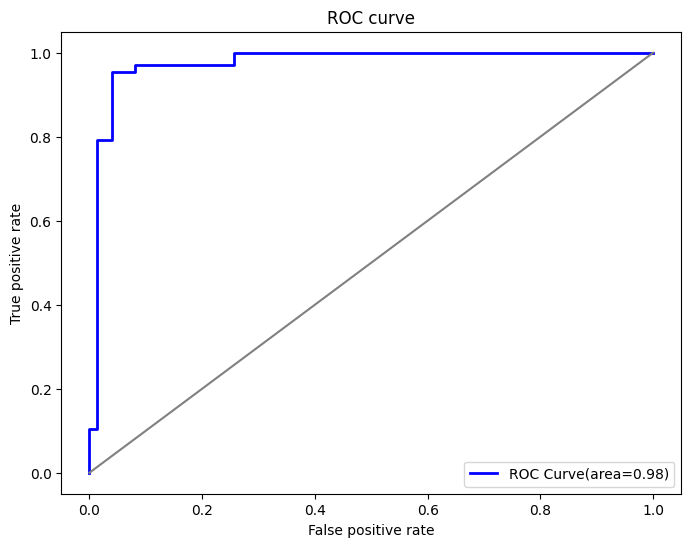

In [78]:
#evaluate the model
from sklearn.metrics import roc_curve,auc
y_scores=rf_model.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_scores)
roc_auc=auc(fpr,tpr)
#plotting the curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color="blue",lw=2,label=f'ROC Curve(area={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='gray',)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Model prediction(testing)

In [79]:
# Model Prediction (Testing)
y_test_pred = best_rf.predict(x_test)
print("\nTest Set Predictions:", y_test_pred)


Test Set Predictions: [1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0
 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1]


Saving the model using pickle

In [80]:
# Save the model
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

In [81]:
# Load the saved model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

Predictions on input data

In [82]:
# Define the input data 
test_data = np.array([
    [22, 2, 2, 0, 0, 0, 1, 2, 1],
    [36, 3, 2, 5, 1, 1, 0, 4, 1],
    [34,3, 0, 0, 0, 0, 0, 1, 0 ],
    [56, 2, 2, 4, 1, 1, 3, 2, 1],
    [29, 2, 2, 3, 1, 1, 0, 4, 0]
])
test_data=pd.DataFrame(test_data,columns=['age','marital staus','std','educational background','hiv test in past year','aids education','places of seeking sex partners','sexual orientation','drug- taking'])
# Make predictions
predictions = model.predict(test_data)

# Interpret results
risk_labels = {0: "Low Risk", 1: "High Risk"}  # Adjust based on your model

# Display predictions
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: Predicted HIV Risk Level - {risk_labels.get(pred, 'Unknown')}")



Sample 1: Predicted HIV Risk Level - Low Risk
Sample 2: Predicted HIV Risk Level - Low Risk
Sample 3: Predicted HIV Risk Level - Low Risk
Sample 4: Predicted HIV Risk Level - Low Risk
Sample 5: Predicted HIV Risk Level - Low Risk
